In [1]:
import minet
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import lines
import numpy as np

/home/heloise/.pyenv/versions/3.10.0/envs/youtube_presidentielles/lib/python3.10/site-packages/secretstorage/util.py:46: UserWarning: Passing unwrap= to .send_and_get_reply() is deprecated and will break in a future version of Jeepney.
  return self._connection.send_and_get_reply(msg, unwrap=True)


# Installation

In [2]:
!pip install -r requirements.txt

# Data collection

In [3]:
!minet youtube search macron --order date > macron_videos_raw.csv

In [4]:
!minet youtube search "le pen" --order date > lepen_videos_raw.csv

# Data preprocessing

In [5]:
df_1 = pd.read_csv('./macron_videos_raw.csv')
df_1 = df_1.drop_duplicates(subset=['video_id'])
df_1 = df_1.head(500)

In [6]:
def get_information_panel_data(df):
    df['video_url'] = "https://www.youtube.com/watch?v=" + df['video_id']
    df['election_panel'] = df['video_url'].apply(lambda x: 'fr2022_president_erip' in requests.get(x).text)
    return df

In [7]:
df_1 = get_information_panel_data(df_1)
df_1.to_csv('./macron_videos.csv', index=False)

In [8]:
df_2 = pd.read_csv('./lepen_videos_raw.csv')
df_2 = df_2.drop_duplicates(subset=['video_id'])
df_2 = df_2.head(500)
df_2 = get_information_panel_data(df_2)
df_2.to_csv('./lepen_videos.csv', index=False)

# Data vizualisation

In [9]:
df_1 = pd.read_csv('./macron_videos.csv')
df_1['published_at'] = pd.to_datetime(df_1['published_at'])

df_2 = pd.read_csv('./lepen_videos.csv')
df_2['published_at'] = pd.to_datetime(df_2['published_at'])

df_t = pd.concat([df_1, df_2])
df_t = df_t.drop_duplicates(subset=['video_id'])

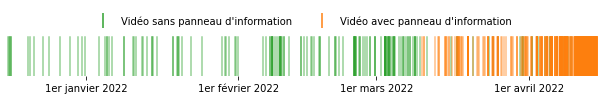

In [10]:
plt.figure(figsize=(8.5, 1.5))
ax = plt.subplot(111)

for date in df_t[~df_t['election_panel']]['published_at'].values:
    plt.plot([date, date], [0, 1], color='C2', alpha=0.5)
for date in df_t[df_t['election_panel']]['published_at'].values:
    plt.plot([date, date], [0, 1], color='C1', alpha=0.5)
    
plt.xlim(np.datetime64('2021-12-16'), np.datetime64('2022-04-15'))
plt.xticks(
    ticks=[np.datetime64(x) for x in ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01']], 
    labels=['1er janvier 2022', '1er février 2022', '1er mars 2022', '1er avril 2022']
)
plt.yticks([])
vertical_line_1 = lines.Line2D([], [], color='C2', marker='|', linestyle='None',
                          markersize=15, markeredgewidth=1.5, label="Vidéo sans panneau d'information")
vertical_line_2 = lines.Line2D([], [], color='C1', marker='|', linestyle='None',
                          markersize=15, markeredgewidth=1.5, label="Vidéo avec panneau d'information")
plt.legend(handles=[vertical_line_1, vertical_line_2], ncol=2, loc='upper center', frameon=False)
plt.ylim(0, 1.8)
ax.set_frame_on(False)
plt.tight_layout()
plt.savefig('./figure_2.png')

In [11]:
len(df_t[df_t['published_at'] < '2022-03-10 00:00:00'])

177

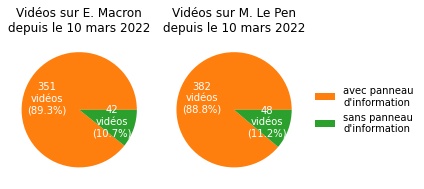

In [12]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d}\nvidéos\n({:.1f}%)".format(absolute, pct)

df_1b = df_1[df_1['published_at'] > '2022-03-10 00:00:00']
plt.subplot(121)
data = [len(df_1b[df_1b['election_panel']]), len(df_1b[~df_1b['election_panel']])]
labels = ["avec panneau\nd'information", "sans panneau\nd'information"]
wedges, texts, autotexts = plt.pie(data, colors=['C1', 'C2'],
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
plt.title("Vidéos sur E. Macron\ndepuis le 10 mars 2022")

df_2b = df_2[df_2['published_at'] > '2022-03-10 00:00:00']
plt.subplot(122)
data = [len(df_2b[df_2b['election_panel']]), len(df_2b[~df_2b['election_panel']])]
wedges, texts, autotexts = plt.pie(data, colors=['C1', 'C2'],
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
plt.legend(wedges, labels, framealpha=0,
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Vidéos sur M. Le Pen\ndepuis le 10 mars 2022")

plt.tight_layout()
plt.savefig('./figure_3.png')